# Conformers of nerve agents of V-series

## Generation of conformers for docking in Rosetta

In [1]:
# remember to source before using RDkit
# source activate my-rdkit-env 
# and open jupyter from this environment

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms as rdmt
import numpy as np
# from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Geometry import rdGeometry as geom

In [3]:
import VXconformers

In [4]:
vxc = VXconformers.VXconformers()

## SMILES of the 3 nerve agents:

* VX 
* Russian VX(RVX) 
* Chinese VX(CVX)

### SMILES taken from pubchem except CVX build from RVX

In [5]:
# SMILES from pubchem except CVX build from RVX
nerve_agents = {'RVX' : 'CC[NH+](CC)CCSP(=O)(C)OCC(C)C',
                'VX'  : 'CCOP(C)(=O)SCC[NH+](C(C)C)C(C)C',
                'CVX' : 'O=P(OCCCC)(SCC[NH+](CC)CC)C'}

In [6]:
mols = {}
for name in nerve_agents.keys():
    mols[name] = vxc.generate_molecule(name,nerve_agents[name])

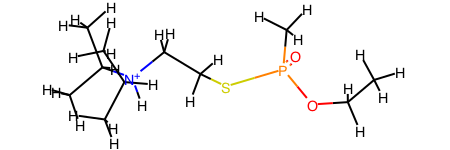

In [7]:
mols['VX']

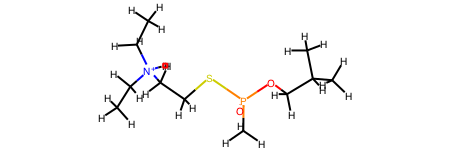

In [8]:
mols['RVX']

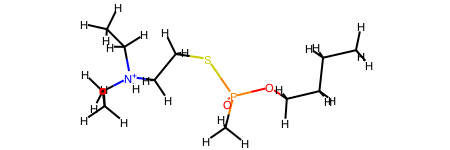

In [9]:
mols['CVX']

In [10]:
cids = vxc.get_conformers(mols['VX'], 500,0.1)

### Atom indexes of P, S, N etc

In [11]:
# p_id, s_id, pc_id, nh_id, po_id, poe_id = get_index_atms( mols['CVX'] )
p_id, s_id, pc_id, nh_id, po_id, poe_id = vxc.get_index_atms( mols['VX'] )
print p_id, s_id, pc_id, nh_id, po_id, poe_id

3 6 4 9 5 2


## Setting parameters for the transition state model
### Distance, angles etc

In [12]:
# P-S bond distance
p_s_dist = 2.36
# Leaving group carbons
##c1_l = 0
##c2_l = 1
##c3_l = 3
##c4_l = 4
# set transition state geometry for S- and R-isomer
dist = 2.36
##LIGAND_NAME = 'CVX'
LIGAND_NAME = 'VX'

In [13]:
# Do a short minimization and compute the RMSD
for cid in cids:
    _ = AllChem.MMFFOptimizeMolecule(mols['VX'], confId=cid)
    ## _ = AllChem.MMFFOptimizeMolecule(mols['CVX'], confId=cid)
rmslist = []
##AllChem.AlignMolConformers(mols['CVX'], RMSlist=rmslist)
AllChem.AlignMolConformers(mols['VX'], RMSlist=rmslist)

In [14]:
# get atom types from index
# vxm_h.GetAtomWithIdx(9).GetSymbol()
##Chem.FindMolChiralCenters(mols['CVX'], p_id, includeUnassigned=True)
Chem.FindMolChiralCenters(mols['VX'], p_id, includeUnassigned=True)

[(3, '?')]

In [15]:
from rdkit.Chem import rdMolTransforms as rdmt
# Add conformers if passing distance filter
##new = Chem.Mol(mols['CVX'])
new = Chem.Mol(mols['VX'])
for cid in cids:
    conf = new.GetConformer(cid)
    # Proton phosphoryl distance
    dist = rdmt.GetBondLength(conf, nh_id, po_id)
    # remove conformers
    if(dist <= 2.3):
        new.RemoveConformer(cid)
conf_ids = [conf.GetId() for conf in new.GetConformers()]
dummy = 1
for m in conf_ids:
    w = Chem.SDWriter('prune'+str(dummy)+'.sdf')
    w.write(new,confId=m)
    dummy += 1

In [16]:
# set transition state geometry for S- and R-isomer
dist = 2.36
##LIGAND_NAME = 'CVX'
LIGAND_NAME = 'VX'

s_isomers, r_isomers = vxc.get_transition_state_geometry(dist, p_id, s_id, pc_id, nh_id, po_id, poe_id)

print len(s_isomers)
print len(r_isomers)

dummy = 1
for test in s_isomers:
    writer3 = Chem.SDWriter('S_'+LIGAND_NAME+'_'+str(p_s_dist)+'_'+str(dummy)+'.sdf')
    writer3.write(test,confId=0)
    dummy += 1
    
dummy = 1
for test in r_isomers:
    writer3 = Chem.SDWriter('R_'+LIGAND_NAME+'_'+str(p_s_dist)+'_'+str(dummy)+'.sdf')
    writer3.write(test,confId=0)
    dummy += 1
writer3.close()

<rdkit.Chem.rdchem.Mol object at 0x10aac53d0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5360> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5670> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5210> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5210> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5750> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5590> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac54b0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5c20> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac51a0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac50c0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10aac5130> <class 'rdkit.Chem.rdchem.Mol'

<rdkit.Chem.rdchem.Mol object at 0x10acd9bb0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9c20> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9c90> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9d00> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9d00> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9ad0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9de0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9e50> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9ec0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9f30> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9fa0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10acd9fa0> <class 'rdkit.Chem.rdchem.Mol'

<rdkit.Chem.rdchem.Mol object at 0x10ad20050> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad203d0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20440> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad204b0> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20520> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20590> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20600> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20670> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20670> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20360> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20750> <class 'rdkit.Chem.rdchem.Mol'> False
<rdkit.Chem.rdchem.Mol object at 0x10ad20750> <class 'rdkit.Chem.rdchem.Mol'

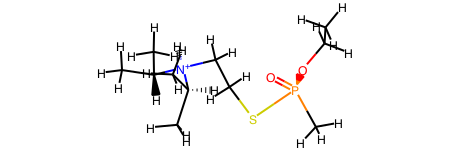

In [17]:
vxc.write_aligned_to_file(r_isomers,(p_id,po_id,poe_id,pc_id),"R_aligned_isomers")
vxc.write_aligned_to_file(s_isomers,(p_id,po_id,poe_id,pc_id),"S_aligned_isomers")

# Add OH- to transition state model

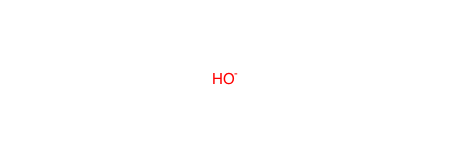

In [18]:
# insert loop here later
s_isomer_ = s_isomers[0]

oh = '[OH-]'
oh = Chem.MolFromSmiles(oh,sanitize=True)
# oh = Chem.AddHs(ohh)
oh.SetProp("_Name","OH-")
AllChem.EmbedMolecule(oh, AllChem.ETKDG())
DrawingOptions.includeAtomNumbers=True
oh

In [19]:
# Get x,y,z position of oxygen atom of hydroxide
pos = oh.GetConformer().GetAtomPosition(0)

In [20]:
import os
prefix_ = "TS_model_"
fls = os.listdir('.')
for fl in fls:
    if(fl.startswith("R_aligned_isomers")):
        conformer= Chem.MolFromMolFile(fl, True, False)
        new_ts_model = vxc.add_hydroxide_to_transition_state_model(oh,p_id,s_id, conformer)
        writer3 = Chem.SDWriter(prefix_+fl)
        writer3.write(new_ts_model,confId=0)